In [ ]:
# Libraries: Standard ones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for boxplots
import seaborn as sns

# K-means function
from sklearn.cluster import KMeans

# Functions for silhouette
from sklearn.metrics import silhouette_samples, silhouette_score

# Function to standardize the data 
from sklearn.preprocessing import scale

# Functions for hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

univ1 = pd.read_csv("univ_propre.csv",sep=";",decimal=',',thousands=' ')
univ=univ1
#print(univ1)
univ1.describe() 

,Score_Rank,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook,Score_Result
count,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000,1396.000000
mean,315.304441,23723.029370,18.966905,0.113481,0.475279,0.477443,28.229083,23.981160,48.113109,46.477292,47.114542,34.794054
std,140.946223,32826.064794,16.835492,0.117747,0.160516,0.160835,14.149550,17.537044,27.735626,16.273498,23.288723,16.946075
min,1.000000,558.000000,0.900000,0.000000,0.000000,0.000000,11.200000,6.800000,1.700000,34.400000,13.100000,10.700000
25%,212.000000,10262.000000,12.375000,0.020000,0.410000,0.410000,18.300000,11.600000,23.375000,35.775000,27.475000,21.000000
50%,336.000000,17832.500000,16.350000,0.080000,0.520000,0.470000,23.800000,18.000000,45.650000,39.400000,43.100000,31.600000
75%,437.000000,29434.000000,21.900000,0.170000,0.570000,0.560000,33.600000,30.100000,71.950000,49.825000,62.800000,44.500000
max,535.000000,830104.000000,493.500000,0.830000,1.000000,1.000000,92.800000,99.600000,100.000000,100.000000,99.700000,95.400000


Text(0.5, 1.0, 'boxplot University s features')

<Figure size 432x288 with 0 Axes>

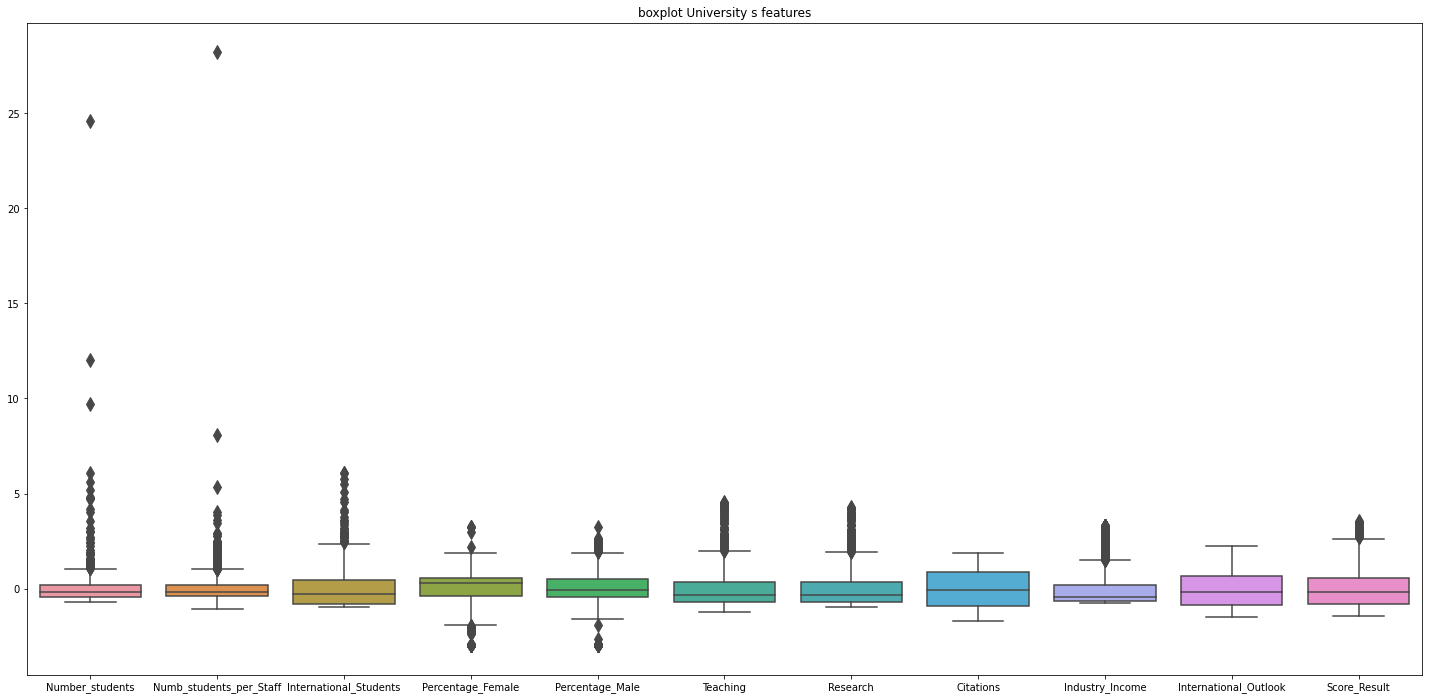

In [ ]:
#On scale les données pour les rendre comparables.

univ_scaled = univ
univ_scaled['Number_students']=scale(univ_scaled['Number_students'])
univ_scaled['Numb_students_per_Staff']=scale(univ_scaled['Numb_students_per_Staff'])
univ_scaled['International_Students'] = scale(univ_scaled['International_Students'])
univ_scaled['Percentage_Female'] = scale(univ_scaled['Percentage_Female'])
univ_scaled['Percentage_Male'] = scale(univ_scaled['Percentage_Male'])
univ_scaled['Teaching'] = scale(univ_scaled['Teaching'])
univ_scaled['Research'] = scale(univ_scaled['Research'])
univ_scaled['Citations'] = scale(univ_scaled['Citations'])
univ_scaled['Industry_Income'] = scale(univ_scaled['Industry_Income'])
univ_scaled['International_Outlook'] = scale(univ_scaled['International_Outlook'])
univ_scaled['Score_Result'] = scale(univ_scaled['Score_Result'])
univ_scaled = univ_scaled.drop(['Score_Rank'],axis=1)




plt.figure()
fig,ax =plt.subplots(figsize=(25,12))
univ_box=sns.boxplot(ax=ax,data=univ_scaled,fliersize=10)  
plt.title('boxplot University s features')

On constate que la boite à moustaches des citations et du rayonnement international sont plus grande que les autres. Cela laisse penser que le classement est significativement influencé par ses 2 métriques car la différence entre les meilleures et les moins bonnes universités y est plus grande. 

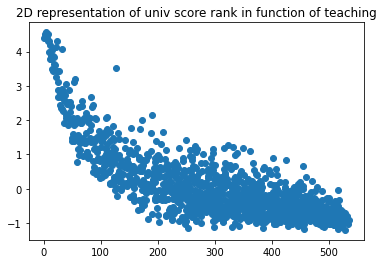

In [ ]:
# Representation of Ruspini dataset
plt.figure()
plt.title('2D representation of univ score rank in function of teaching')
#plt.title('2D representation of univ score rank in function of research')
plt.scatter(univ1['Score_Rank'],univ1['Teaching'])
#plt.scatter(univ1['Score_Rank'],univ1['Research'])

On voit grâce à cette figure que mieux une entreprise est classé, mieux son score de recherche ou d'enseignement ou de recherche est élevé (décommenter la dernière ligne pour voir la figure en fonction du score de recherche).

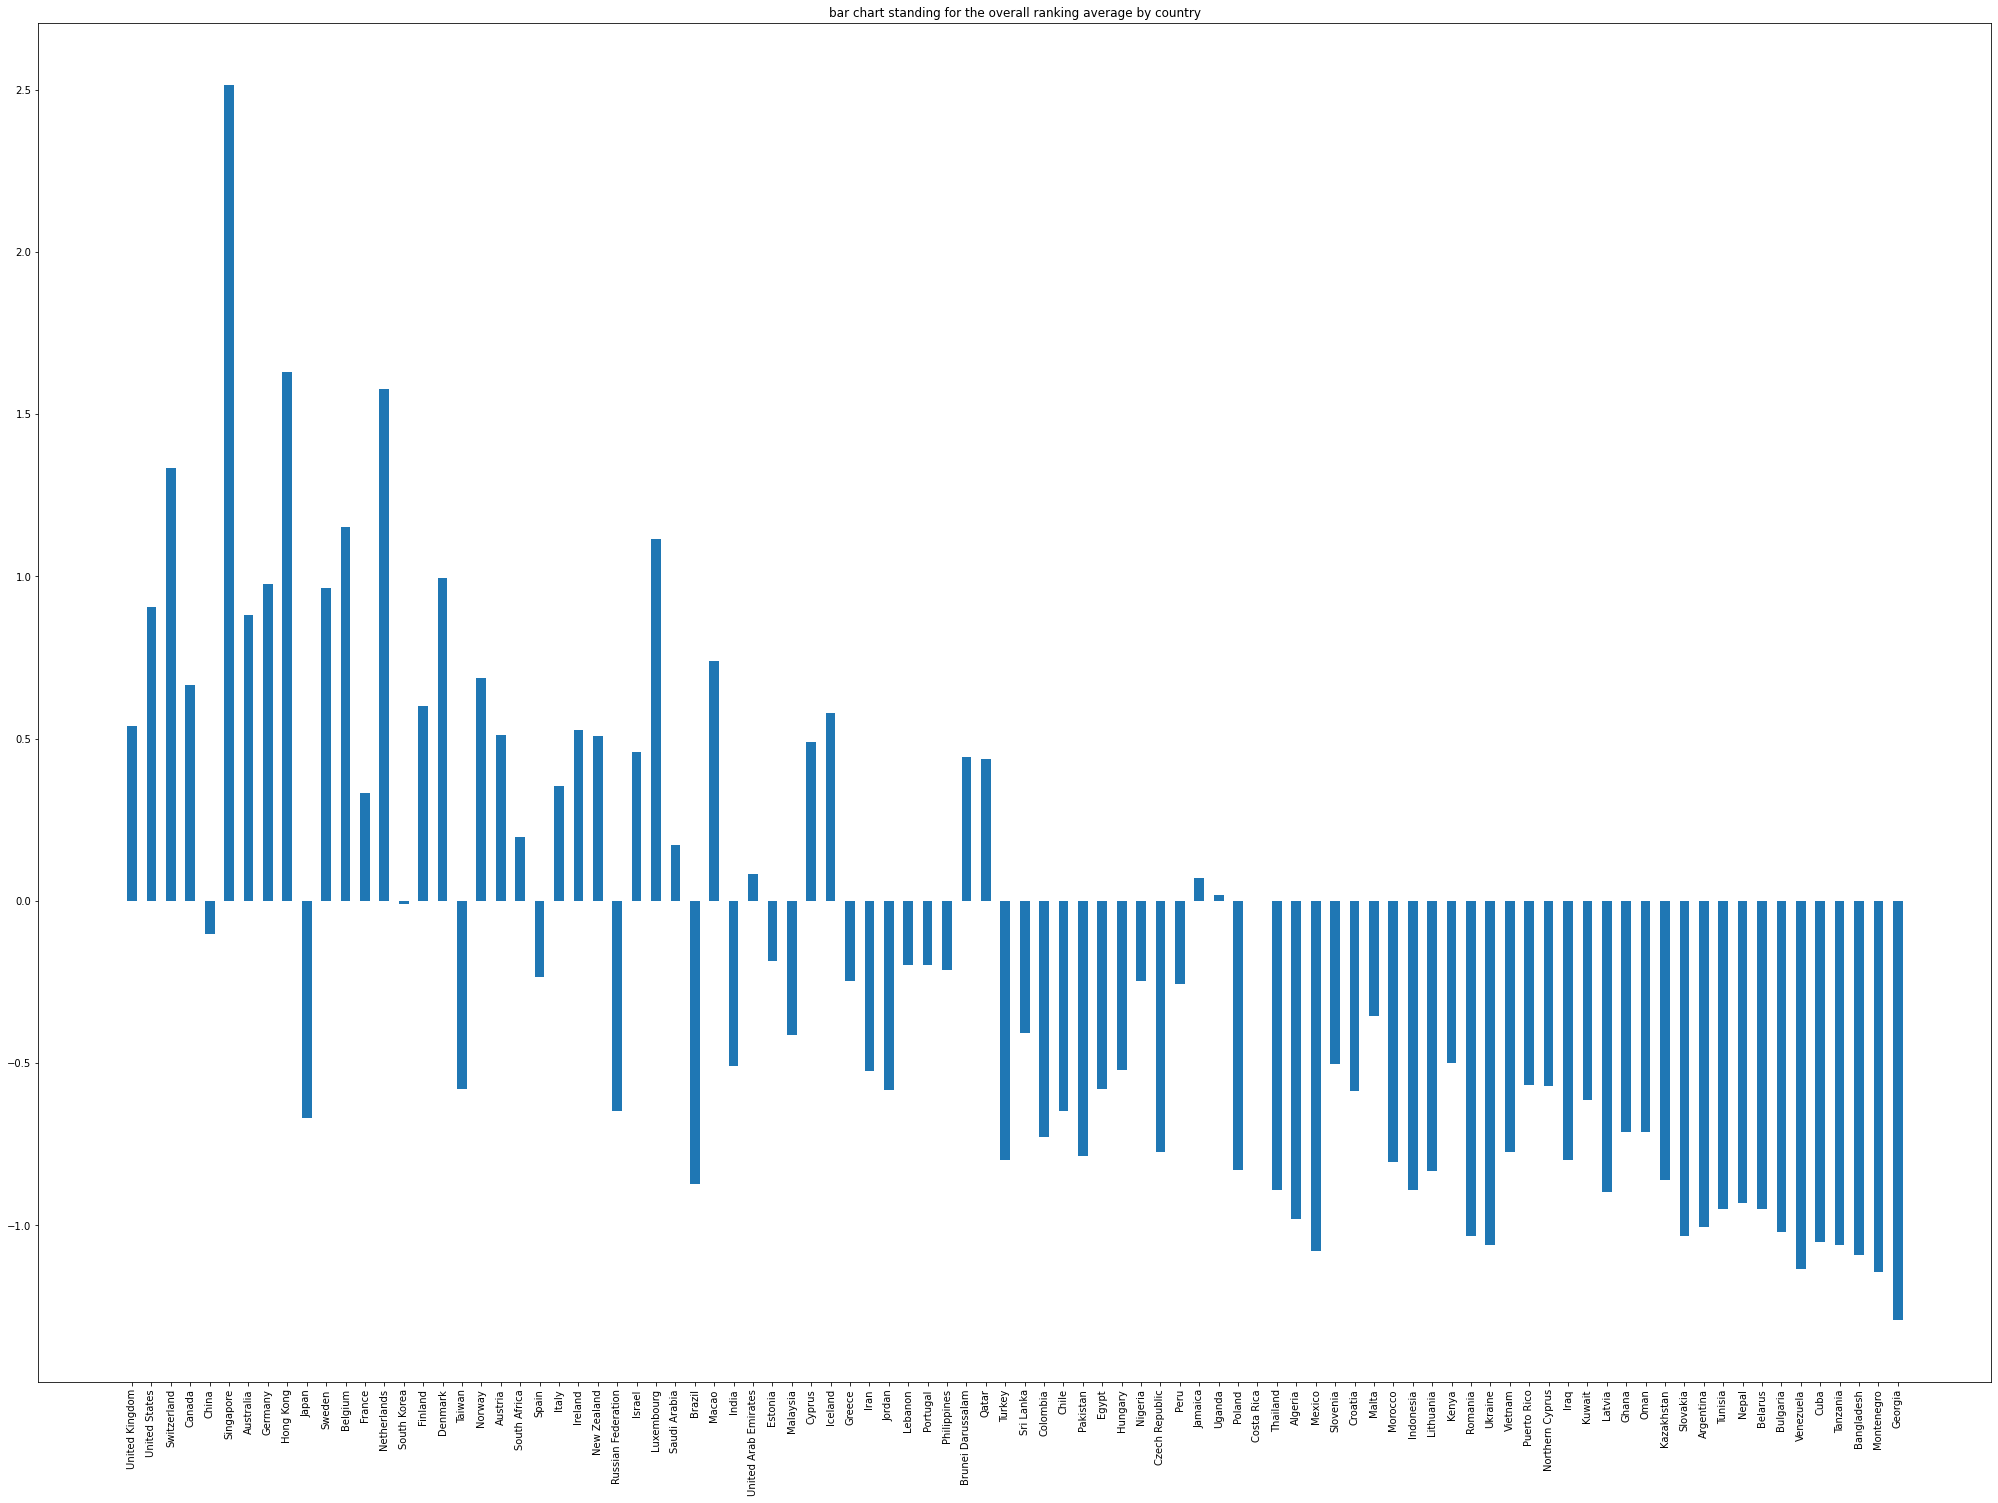

In [ ]:
#On cherche ici à comparer la moyenne du score totale des écoles par pays

list_country=[]
list_moyenne= []
list_teacher=[]
list_research=[]
for country in univ1['Country']:
  if country in list_country:
    continue
  list_country.append(country)
  #print(univ1[univ1['Country']==country]['Overall_Ranking_corriger'].mean())
  list_moyenne.append(univ1[univ1['Country']==country]['Score_Result'].mean())
  list_teacher.append(univ1[univ1['Country']==country]['Teaching'].mean())
  list_research.append(univ1[univ1['Country']==country]['Research'].mean())
 # print(country)


f=plt.figure(figsize=(35, 25))

plt.title('bar chart standing for the overall ranking average by country')
graph= plt.bar(list_country,height=list_moyenne,width=0.5)
plt.xticks(range(len(list_country)),list_country,rotation=90)
f.savefig('overall_ranking_by_country.png',bbox_inches='tight')

On remarque que les pays les mieux classés sont Singapour, Honk-Kong et les Pays Bas (score moyen entre 60 et 80) tandis que parmi les pays les moins classés, on trouve principalement des pays d'Europe de l'est, d'Afrique et d'Asie centrale (score moyen de 20).
Et la France dans tous ca ?
Elle se trouve dans la catégorie moyenne supérieur du classement (score moyen de 43) à égalité avec l'Italie et le Royaume Unis.

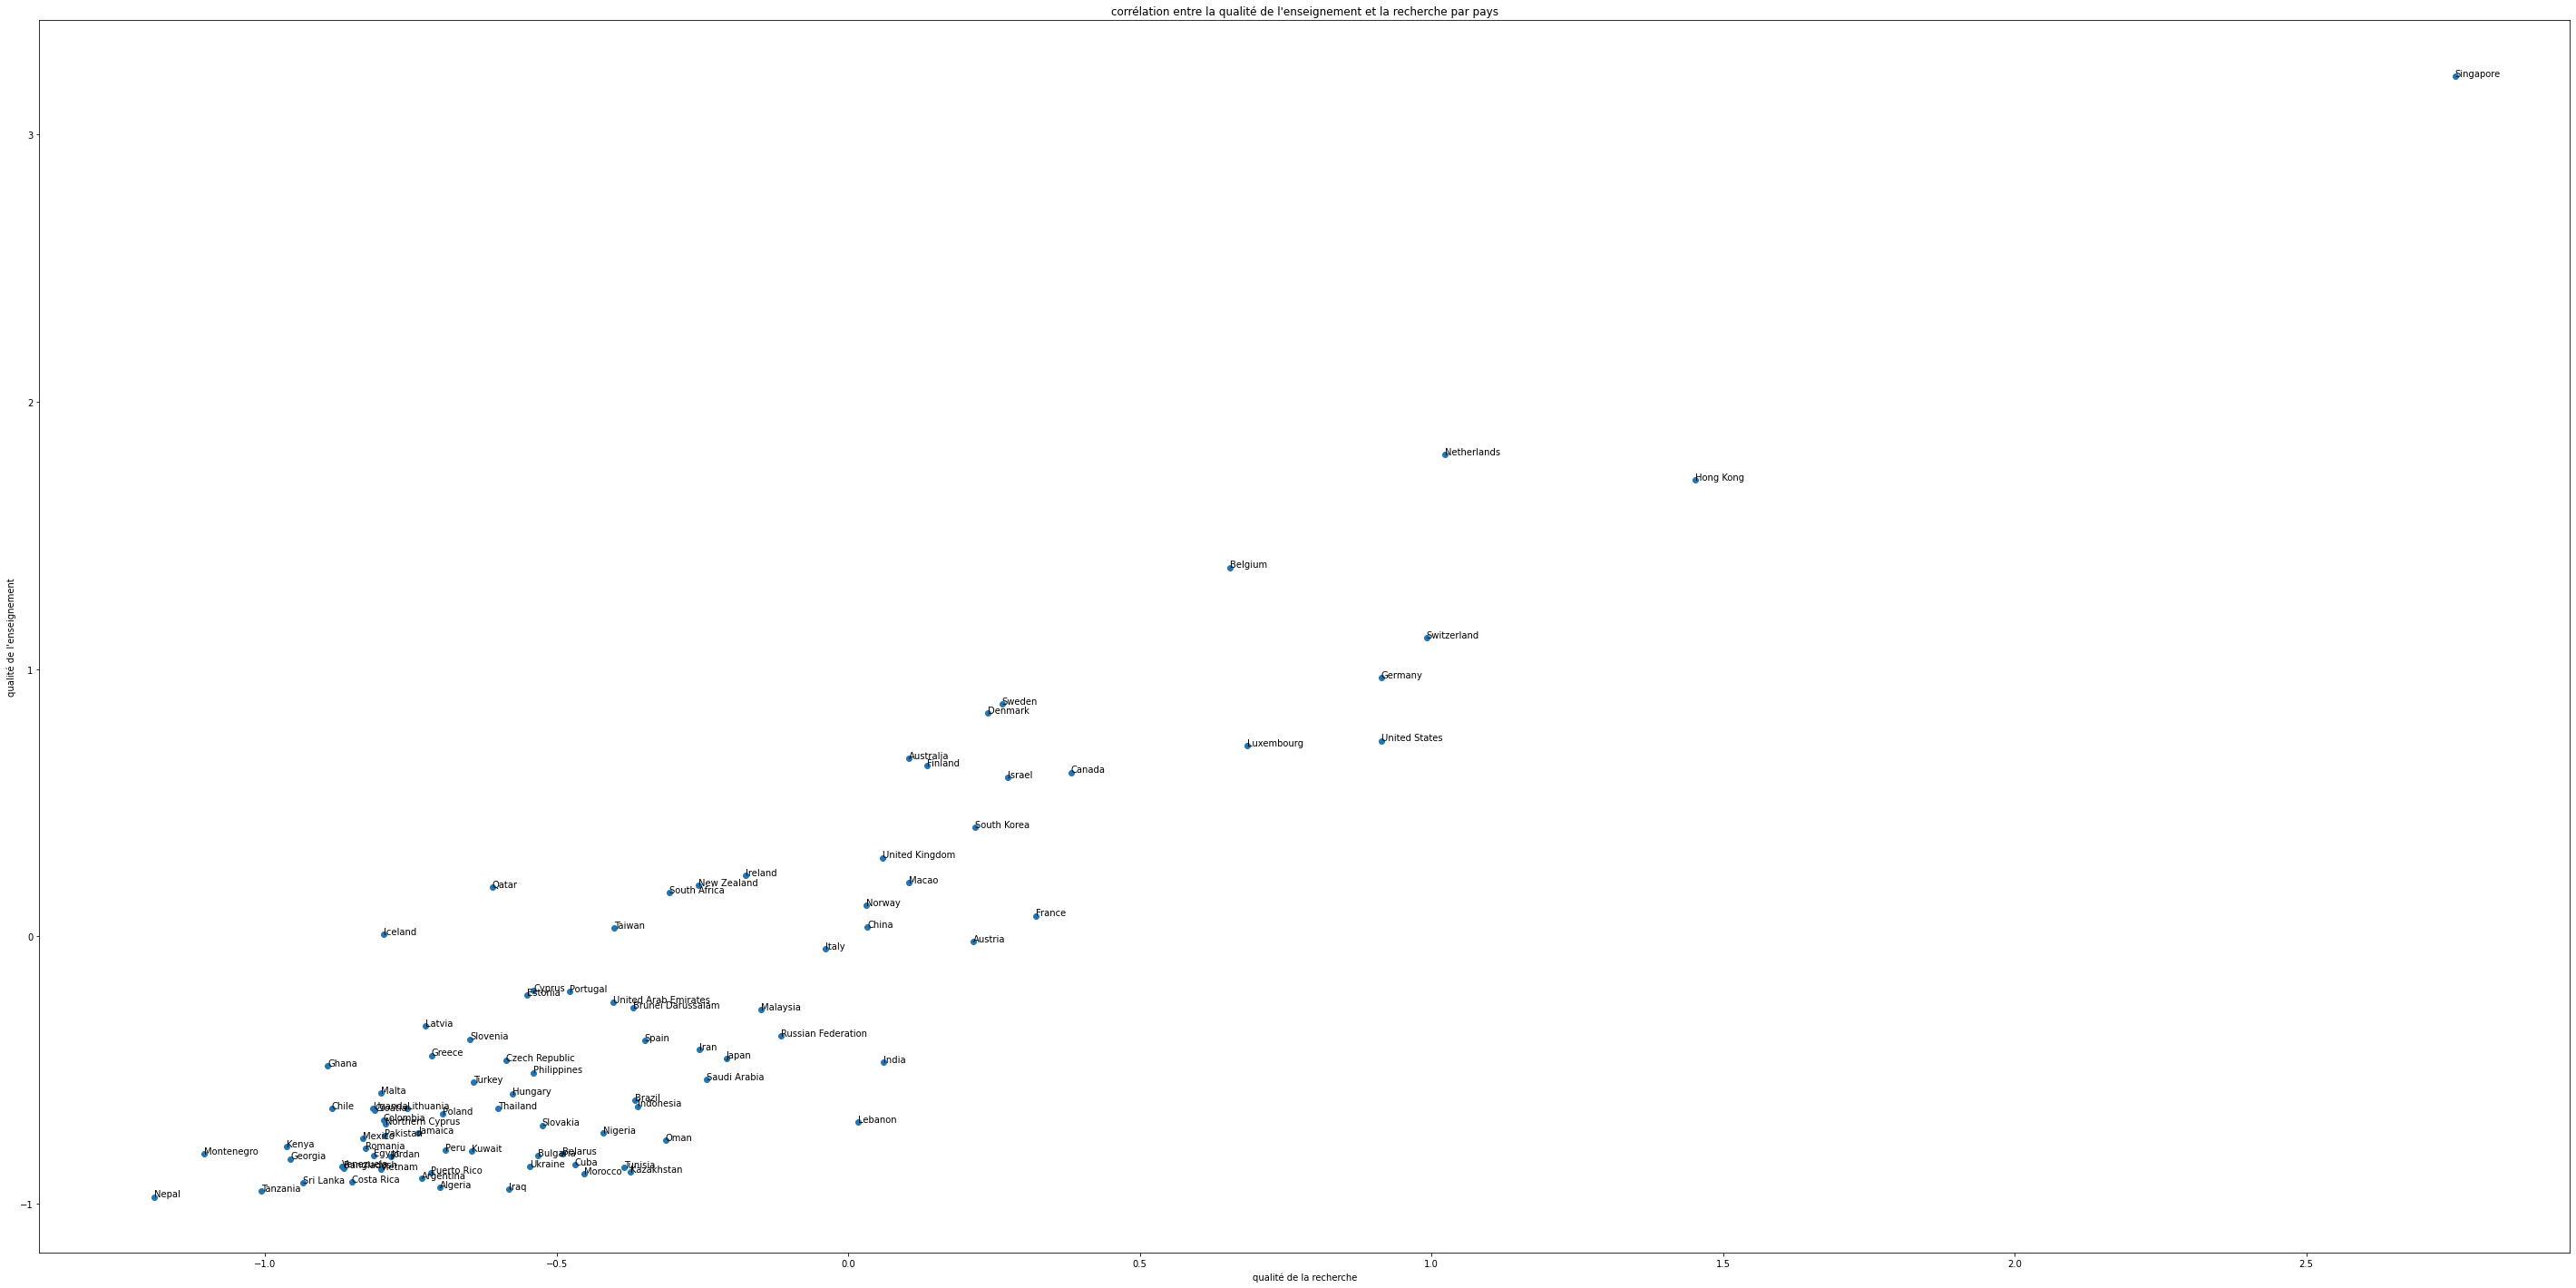

In [ ]:
#Nous cherchons ici à comparer les pays en fonction de leur score de recherche (abscisse) et de leur qualité d'enseignement.
p=plt.figure(figsize=(50, 25))
plt.title("corrélation entre la qualité de l'enseignement et la recherche par pays")
plt.xlabel("qualité de la recherche")
plt.ylabel("qualité de l'enseignement")
plt.scatter(list_teacher,list_research)
for i in range(len(list_country)):
    plt.text(list_teacher[i], list_research[i], list_country[i])
p.savefig('university.png',bbox_inches='tight')
plt.show()

On observe visuellement une corrélation positive, c'est à dire que le coefficient de corrélation serait positif, entre le score de recherche et la qualité de l'enseignement.
Les 3 meilleurs élèves sont Singapour, Honk Kong et les Pays Bas. On retrouve les même pays que dans le graphe précédent ce qui est cohérent.
Cependant on remarque également que les scores de l'Espagne, du Japon et de l'Iran sont très proche ce qui paraît étrange. On peut se poser la question de la pertinence du calcul de ces scores. 

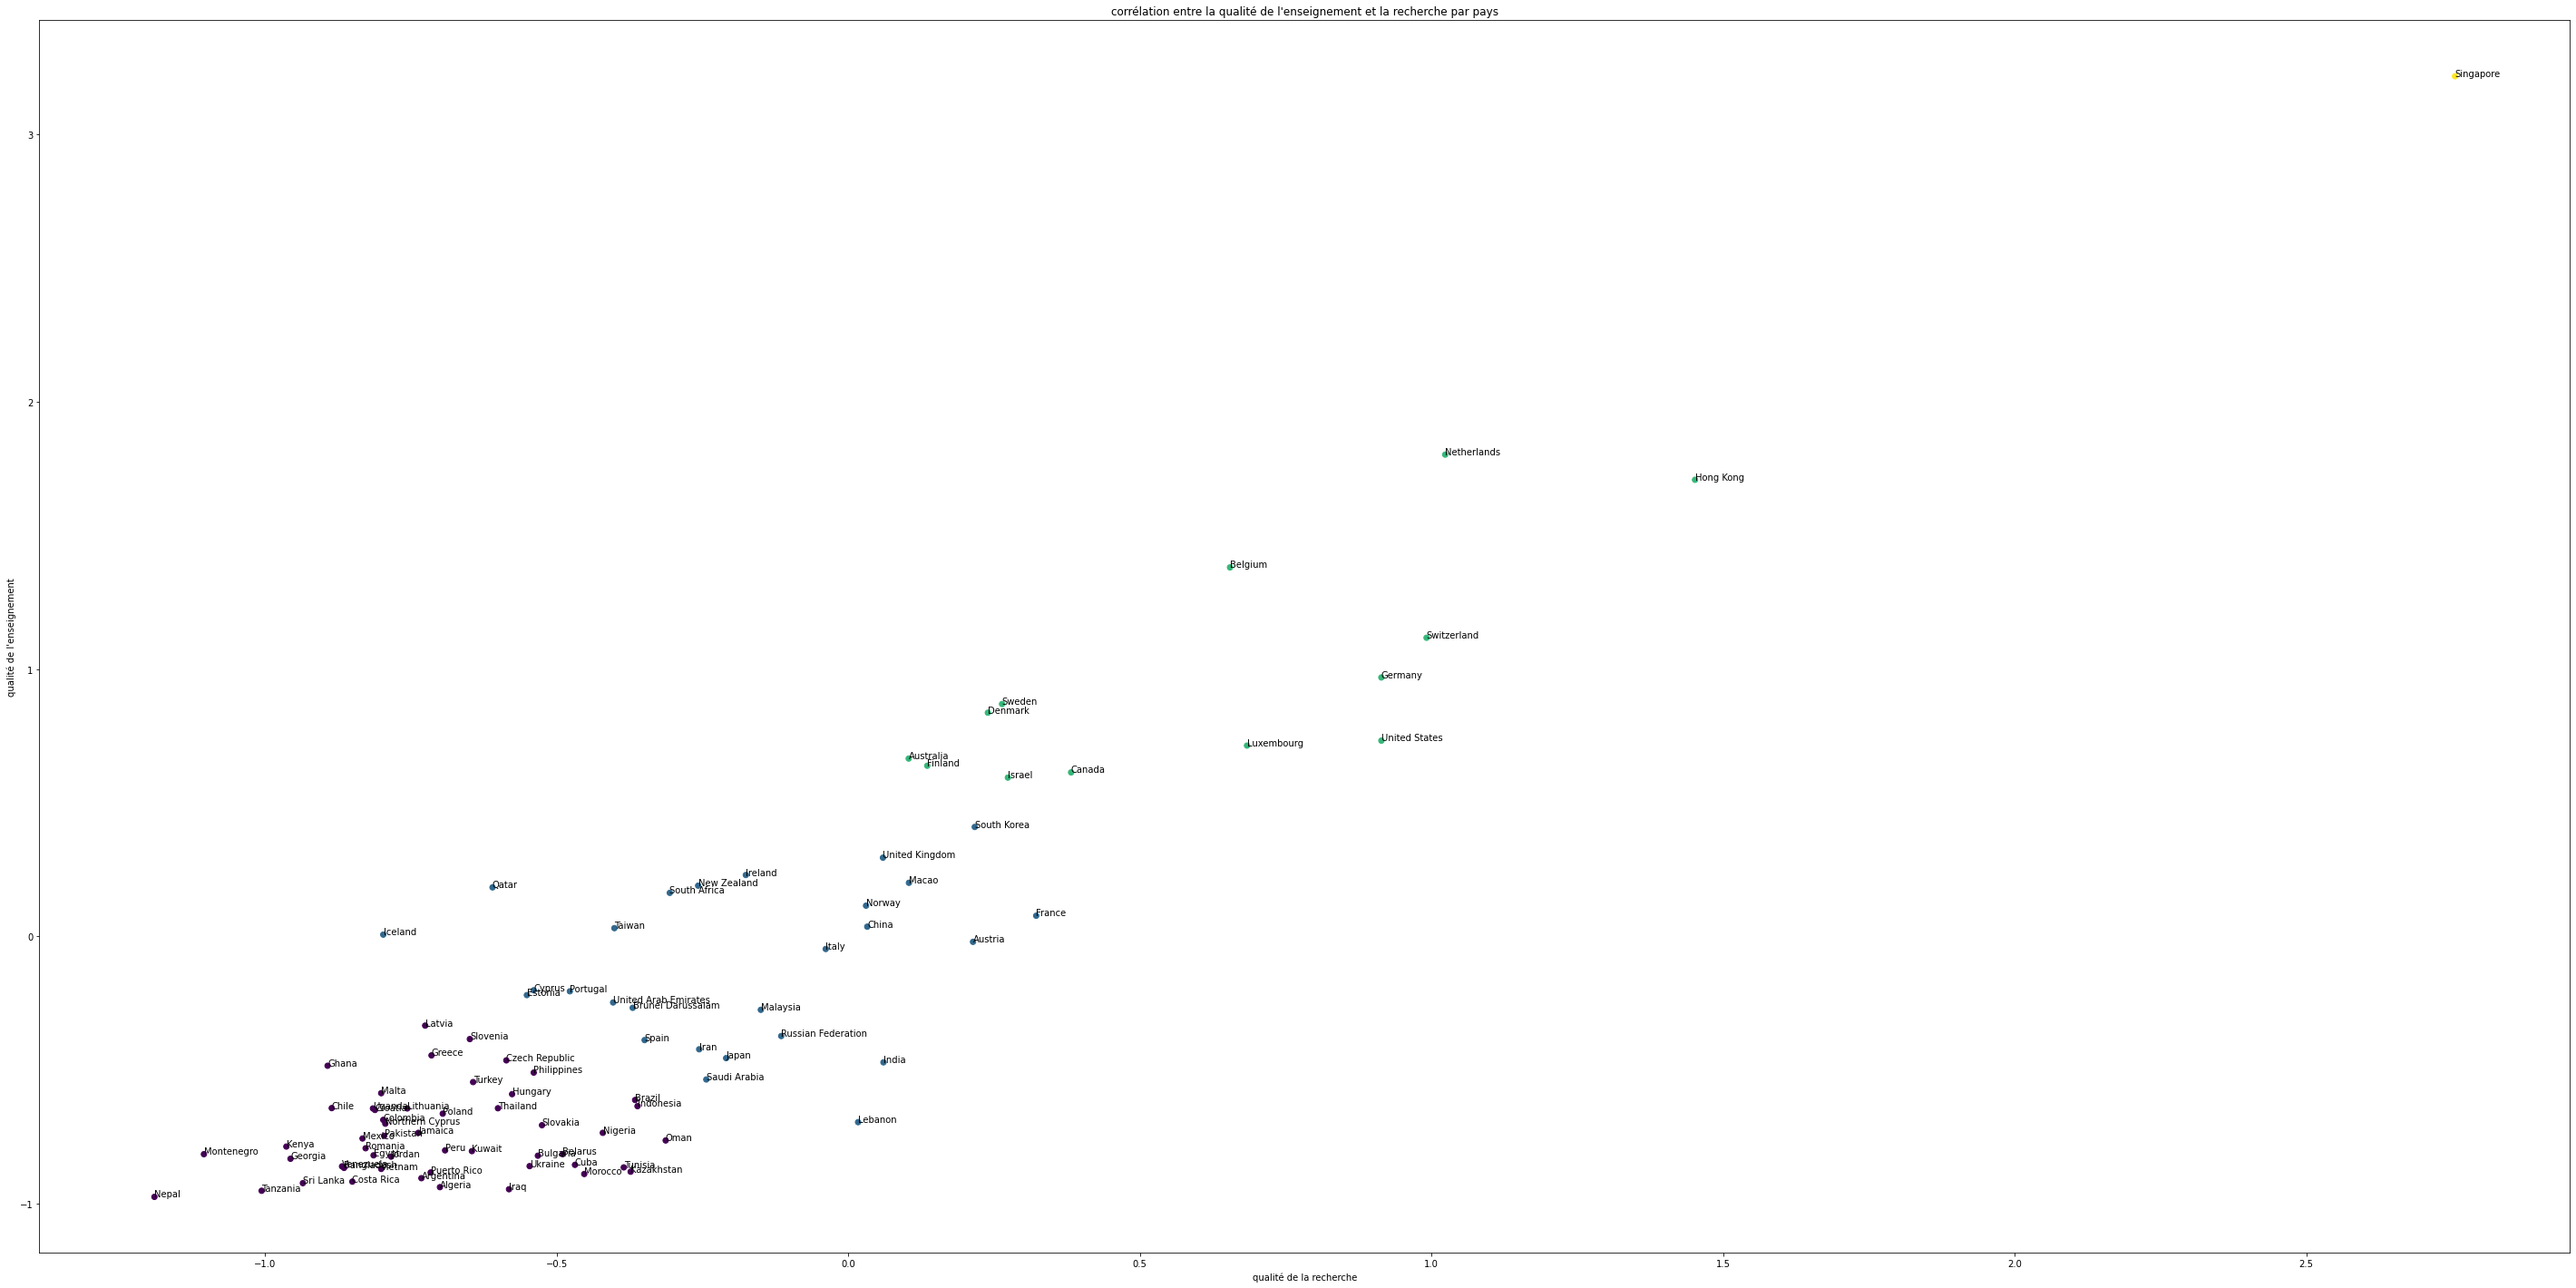

In [ ]:
#on teste le clustering sur la figure précédante avec 4 clusters de départ et 4 itérations
data_cluster=pd.DataFrame({'Teaching':list_teacher,'Research':list_research},columns=['Teaching','Research'])
kmeans = KMeans(n_clusters=4,n_init=4,init='random').fit(data_cluster)
centers=kmeans.cluster_centers_
p1=plt.figure(figsize=(50, 25))
plt.title("corrélation entre la qualité de l'enseignement et la recherche par pays")
plt.xlabel("qualité de la recherche")
plt.ylabel("qualité de l'enseignement")
plt.scatter(list_teacher,list_research,c=kmeans.labels_)
for i in range(len(list_country)):
    plt.text(list_teacher[i], list_research[i], list_country[i])
p1.savefig('cluster.png',bbox_inches='tight')
plt.show()

In [ ]:
# Compute the silhouette index for each cluster number
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
for n in range_n_clusters:
  clusterer = KMeans(n_clusters=n, n_init=10).fit(data_cluster) # Clustering with the given number of clusters
  cluster_labels = clusterer.labels_ # Extract the labels
  silhouette_avg = silhouette_score(data_cluster, cluster_labels) # Corresponding silhouette score
   
  # Display the results
  print("For n =", n, "Silhouette_score:", silhouette_avg)

For n = 2 Silhouette_score: 0.6431559986217269
For n = 3 Silhouette_score: 0.5775772671985568
For n = 4 Silhouette_score: 0.5025747633004426
For n = 5 Silhouette_score: 0.43805832245972487
For n = 6 Silhouette_score: 0.42602867498525937
For n = 7 Silhouette_score: 0.4071716528152059
For n = 8 Silhouette_score: 0.4080501606880979
For n = 9 Silhouette_score: 0.41732005891936136
For n = 10 Silhouette_score: 0.39465252287311336


Nous voulons maximiser le silhouette_score. On remarque que cette indice est plus haut avec 2 clusters. Il faut donc privilégier 2 clusters.


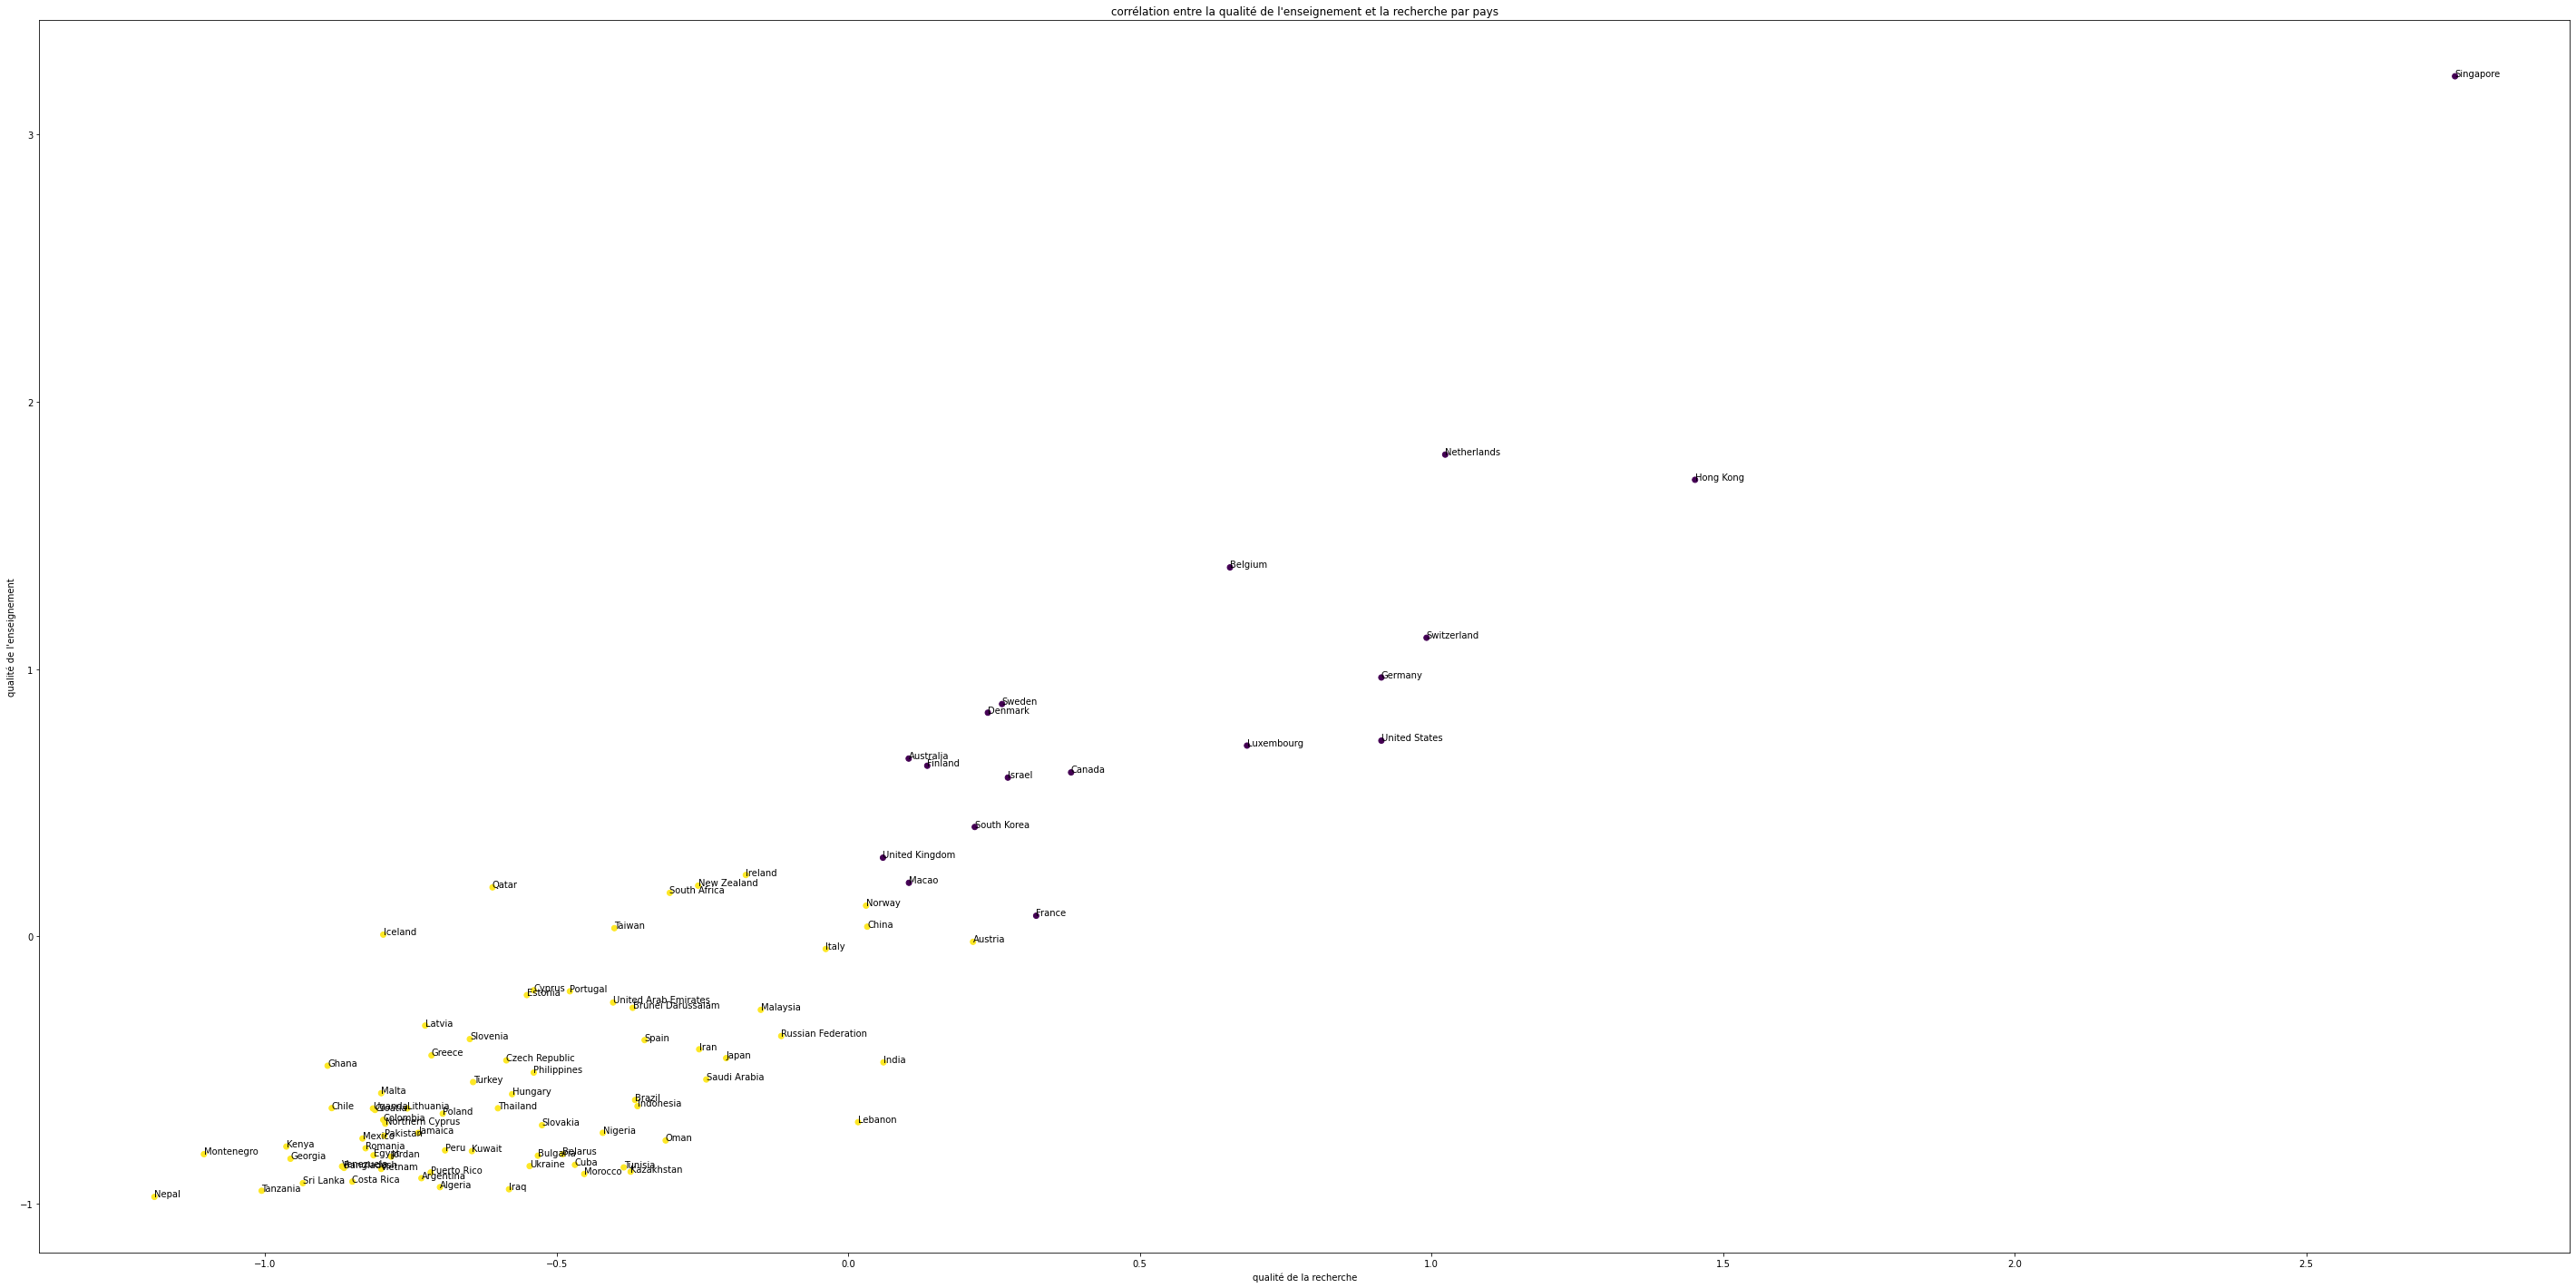

In [ ]:
#Avec 2 clusters et 10 inits, cela donne
data_cluster=pd.DataFrame({'Teaching':list_teacher,'Research':list_research},columns=['Teaching','Research'])
kmeans = KMeans(n_clusters=2,n_init=10,init='random').fit(data_cluster)
centers=kmeans.cluster_centers_
p2=plt.figure(figsize=(50, 25))
plt.title("corrélation entre la qualité de l'enseignement et la recherche par pays")
plt.xlabel("qualité de la recherche")
plt.ylabel("qualité de l'enseignement")
plt.scatter(list_teacher,list_research,c=kmeans.labels_)
for i in range(len(list_country)):
    plt.text(list_teacher[i], list_research[i], list_country[i])
p2.savefig('clusterFinal.png',bbox_inches='tight')
plt.show()

On constate que le cluster de gauche regroupe plus de pays qui ont des points relativement proches. Le 2e cluster contient des points qui sont assez éloignés des autres, ce qui veut dire que la différence est plus marqué entre 2 pays dans le haut du classement que dans 2 pays dans le bas du classement.

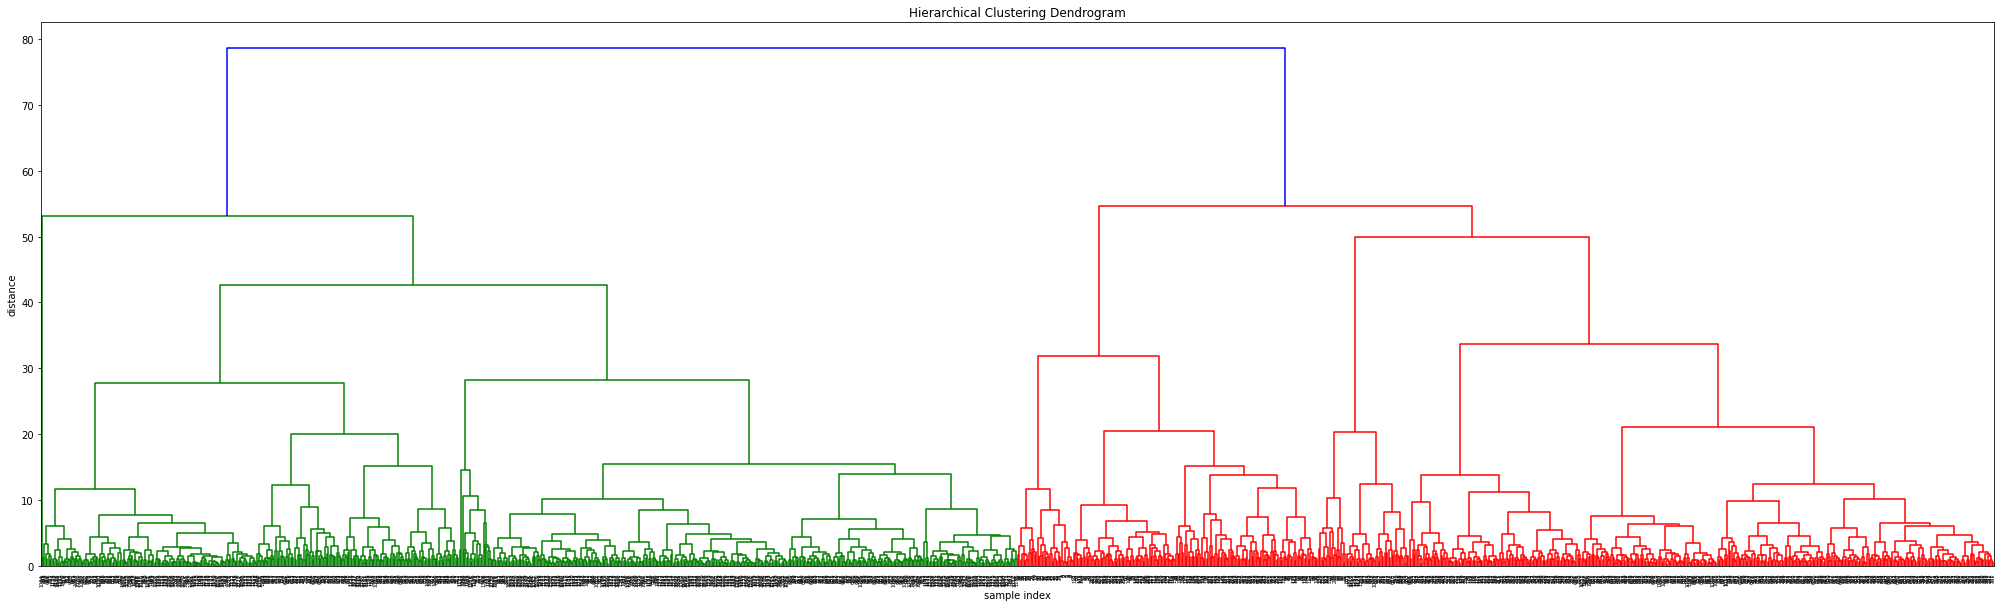

In [ ]:
univ_scaled2 = univ_scaled.drop(['University','Country','Rank_Char'],axis=1)
Z = linkage(univ_scaled2, 'ward') 
plt.figure(figsize=(35, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z = linkage(univ_scaled2, 'ward')
)
plt.show()

In [ ]:
def plot_corr(corr):
  
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap)

In [ ]:
sns.set_style('darkgrid')
plt.rc('figure', figsize=[8, 6])

In [ ]:
data = univ_scaled

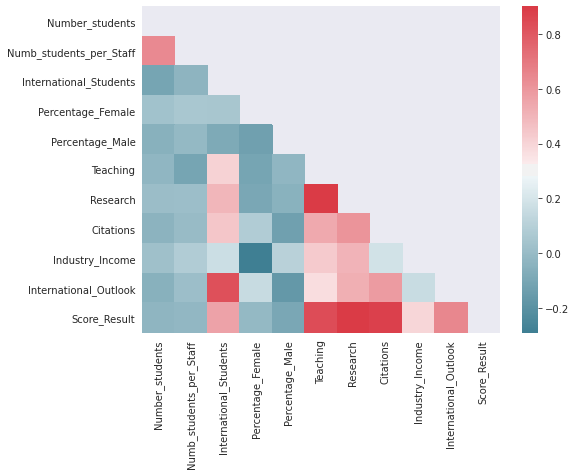

In [ ]:
corr = data.corr()
plot_corr(corr)

On peut lire ici le niveau de corrélation entre chaque paramètre du classement des universités. On peut remarquer des évidences comme par exemple que la recherche est corrélée avec l'enseignement. Ici tout n'est pas exploitable, rechercher une corrélation entre le niveau d'enseignement et le nombre d'étudiants hommes n'a que peu de sens. On s'intéressera donc ici a la dernière ligne. Celle qui décrit la corrélation entre le Score d'une université avec les autres paramètres. Cela afin de voir quel critère est le plus déterminant dans le classement. D'ou le tableau suivant

In [ ]:
nb = round(univ['Score_Rank'].corr(univ['Number_students']),4)
nb_psatff = round(univ['Score_Rank'].corr(univ['Numb_students_per_Staff']),4)
International = round(univ['Score_Rank'].corr(univ['International_Students']),4)
Female = round(univ['Score_Rank'].corr(univ['Percentage_Female']),4)
Male = round(univ['Score_Rank'].corr(univ['Percentage_Male']),4)
Teaching = round(univ['Score_Rank'].corr(univ['Teaching']),4)
Research = round(univ['Score_Rank'].corr(univ['Research']),4)
Citation = round(univ['Score_Rank'].corr(univ['Citations']),4)
Industry = round(univ['Score_Rank'].corr(univ['Industry_Income']),4)
Outlook = round(univ['Score_Rank'].corr(univ['International_Outlook']),4)

Correlation = [["Coorélation","Number_students","Numb_students_per_Staff","International_Students","Percentage_Female","Percentage_Male","Teaching","Research","Citations","Industry_Income","International_Outlook"],
                ["Score_Rank",nb,nb_psatff,International,Female,Male,Teaching,Research,Citation,Industry,Outlook]]
pd.DataFrame(Correlation)

,0,1,2,3,4,5,6,7,8,9,10
0,Coorélation,Number_students,Numb_students_per_Staff,International_Students,Percentage_Female,Percentage_Male,Teaching,Research,Citations,Industry_Income,International_Outlook
1,Score_Rank,0.0327,0.004,-0.5643,-0.0021,0.1094,-0.7792,-0.8437,-0.9111,-0.3948,-0.6691


On voit donc ici en conclusion que les critères les plus déterminants sur le score d'une université sont pour ce classement: La qualité de son enseignement, la qualité de sa recherche et le nombre de citations. De manière moins importante mais tout de même déterminant le rayonnement international ainsi que le pourcentage d'étudiant étranger participent aussi à un bon score. Le nombre d'étudiants, le nombre d'étudiants par professeur, le pourcentage homme/femme sont eux peu discriminants ni déterminants.